# Numerical Anlysis for Non-Linear Optimization 


## First-Order Linear Equations

In the next week, we will study equation of the form: 

$$ 
x'(t) = f(t, x(t))
$$

where $f: (a,b) \times (c,d) \to \mathbb{B}$ is continuous, $-\infty \leq a<b \leq \infty$ and $-\infty \leq c,d \leq \infty$.


### Variation of Constants Formula 

Consider

$$
\begin{align}
x' &= p(t)x+q(t) \\
x(t_0) &= x_0
\end{align}
$$

where $p,q:(a,b) \to \mathbb{R}$ are continuous functions, $-\infty \leq a < b
\leq \infty$, $t_0 \in (a,b)$ and $x_0\in \mathbb{R}$. 

Then for $t\in(a,b)$, the solution of the above equation is given by

$$
x(t) = e^{\int_{t_0}^{t} p(\tau)\, d\tau} x_0 + e^{\int_{t_0}^{t} p(\tau)\, d\tau} \int_{t_0}^{t} e^{-\int_{t_0}^{s} p(\tau)\, d\tau} q(s)\, ds,

$$

***Example***

COnsider $p(\tau) = \tau$ and $q(\tau) = \sin(\tau)$. First, let's write a function to compute the solution of the above equation.


In [25]:
def phi(p, q, x0, t0, t):
    tau, s = var('tau s')
    # Compute the exponential integrating factor
    exp_int_p = exp(integrate(p(tau), (tau, t0, t)))
    
    # First term
    term1 = exp_int_p * x0
    
    # Inner integral inside the second term
    inner_exp = exp(-integrate(p(tau), (tau, t0, s)))
    inner_integrand = inner_exp * q(s)
    inner_integral = integrate(inner_integrand, (s, t0, t))
    
    # Second term
    term2 = exp_int_p * inner_integral
    
    return term1 + term2


Then, let's define the adeuacte parameters:

In [26]:
t, t0 = var('t t0')

assume( t0 > 0)
assume(t > t0)

p(t) = -2
q(t) = 140 + 20 * exp(-2*t)
x0 = 40
x = phi(p, q, x0, 0, t)
print(x.expand())

20*t*e^(-2*t) - 30*e^(-2*t) + 70


Finally, let's verify that the given function is a solution of the initial value problem.

In [27]:
diff(x,t).expand()

-40*t*e^(-2*t) + 80*e^(-2*t)

In [28]:
(p(t)*x + q(t)).expand()

-40*t*e^(-2*t) + 80*e^(-2*t)

In [29]:
x(t=0)

40

## Autonomous Equations

The equation 
$$
\begin{equation}
\tag{1.6}
x'=f(x)
\end{equation}
$$

is called autonomous because $f$ doesn't depends explicitly on $t$. We assume that $f:\mathbb{R} \to \mathbb{R}$ is continuously differentiable function. 

**Theorem 1.8**  
*If $x$ is a solution of the autonomous differential equation (1.6) on an interval $(a, b)$, where $-\infty \leq a < b \leq \infty$, then for any constant $c$, the function $y$ defined by $y(t) := x(t - c)$, for $t \in (a + c, b + c)$, is a solution of (1.6) on $(a + c, b + c)$.*



**Definition 1.9**  
*If $f(x_0) = 0$ we say that $x_0$ is an* *equilibrium point* *for the differential equation (1.6). If, in addition, there is a $\delta > 0$ such that*

$$
f(x) \ne 0 \quad \text{for } |x - x_0| < \delta,\ x \ne x_0,
$$

*then we say $x_0$ is an* *isolated equilibrium point*.



***Example (1.10)***

Consider the equation $x'= -2(x-70)$. 
- $x=70$ is the only equilibrium point. 
- Any solution is in the form $x(t)=De^{-2t}+70$. 
- We cna verify that $x(t-c)$ is a solution. 

**Definition 1.11**  
*Let $\phi$ be a solution of (1.6) with maximal interval of existence $(\alpha, \omega)$. Then the set*

$$
\{ \phi(t) : t \in (\alpha, \omega) \}
$$

*is called an* *orbit* *for the differential equation (1.6).*


Note that the orbits for

$$
x' = -2(x - 70)
$$

are the images of the sets

$$
(-\infty, 70), \quad \{70\}, \quad (70, \infty).
$$

under the solution $x(t)$. 


In [30]:
var('x t x0')
f(x) = -2 * (x - 70)

def G(x0): 
    return 70 + (x0 - 70) * exp(-2 * t)

phi = G(x0)

phi.diff(t).expand()


-2*x0*e^(-2*t) + 140*e^(-2*t)

In [31]:
f(phi).expand()

-2*x0*e^(-2*t) + 140*e^(-2*t)

In [32]:
phi(t = 0) 

x0

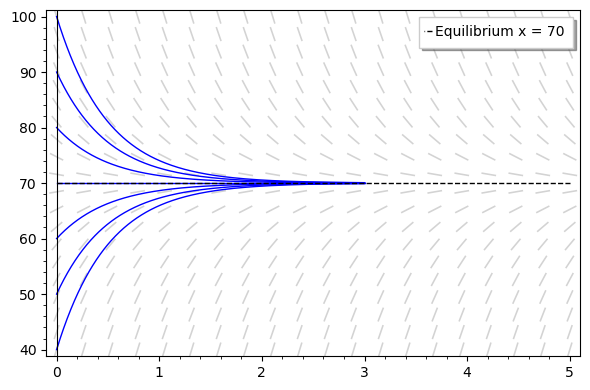

In [33]:

# Initial conditions
x0_values = [40, 50, 60, 70, 80, 90, 100]
solutions = [ phi(x0=x0) for x0 in x0_values]

# Slope field in the (t, x) plane
slope_field = plot_slope_field(
    f, (t, 0, 5), (x, 40, 100), color='lightgray')

# Plot solution curves
solution_plots = sum(
    [plot(sol, (t, 0, 3),) for sol, x0 in zip(solutions, x0_values)])

# Equilibrium line
equilibrium_line = plot(
    70, (t, 0, 5), 
    color='black', linestyle='--', legend_label='Equilibrium x = 70')

# Show the complete plot
show(slope_field + solution_plots + equilibrium_line, figsize=6)


**Theorem 1.12**  
*Assume that $f : \mathbb{R} \to \mathbb{R}$ is continuously differentiable. Then two orbits of (1.6) are either disjoint sets or are the same set.*


**Example 1.13** *(Logistic Growth)*  
The logistic law of population growth (Verhulst [52], 1838) is

$$
N' = rN \left(1 - \frac{N}{K} \right),
$$

where $N$ is the number of individuals in the population, $r(1 - N/K)$ is the *per capita growth rate* that declines with increasing population, and $K > 0$ is the *carrying capacity* of the environment.  
What are the orbits of the differential equation in this case?


In [34]:
var('t r K')
N = function('N')(t)
Np = r*N*(1-N/K)
factor(diff(Np, t).subs({diff(N,t):Np}))

(K - N(t))*(K - 2*N(t))*r^2*N(t)/K^2

In [35]:
# Define variables
var('t N r K N0')

f = r * N * (1-N/K)

# phi = (K*N0*exp(r*t))/(K + N0*(exp(r*t) - 1))
def G(N0, K, r):
    return (K*N0*exp(r*t))/(K + N0*(exp(r*t) - 1))

phi = G(N0, K, r)

phi.diff(t).factor()

(K - N0)*K*N0*r*e^(r*t)/(N0*e^(r*t) + K - N0)^2

In [36]:
f(N = phi).factor()

(K - N0)*K*N0*r*e^(r*t)/(N0*e^(r*t) + K - N0)^2

In [37]:
phi(t=0)

N0

In [38]:
# Initial conditions 
import numpy as np 

K = 100
r = 0.1
N0_values = np.arange(1, 2*K, 10)

solutions = [ G(N0, K, r) for N0 in N0_values]

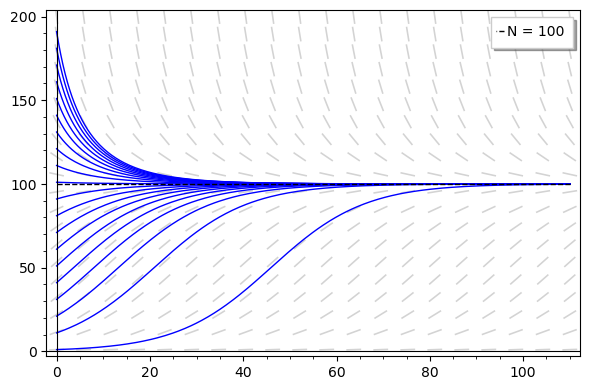

In [39]:
T = 110

# Slope field in the (t, x) plane
slope_field = plot_slope_field(f(r=r, K =K), (t, 0, T), (N, 1, 2*K), color='lightgray')

# Plot solution curves
solution_plots = sum([plot(sol, (t, 0, T),) for sol, N0 in zip(solutions, N0_values)])

# Equilibrium line
equilibrium_line = plot(K, (t, 0, T), color='black', linestyle='--', legend_label=f'N = {K}')

# Show the complete plot
show(slope_field + solution_plots + equilibrium_line, figsize=6)

**Definition 1.15** We say that an equilibrium point $x_0$ of the differential equation (1.6) is *stable* provided given any $\epsilon > 0$ there is a $\delta > 0$ such that whenever $|x_1 - x_0| < \delta$ it follows that the solution $\phi(\cdot, x_1)$ exists on $[0, \infty)$ and $|\phi(t, x_1) - x_0| < \epsilon$, for $t \geq 0$. 


If, in addition, there is a $\delta_0 > 0$ such that $|x_1 - x_0| < \delta_0$ implies that $\lim_{t \to \infty} \phi(t, x_1) = x_0$, then we say that the equilibrium point $x_0$ is *asymptotically stable*. If an equilibrium point is not stable, then we say that it is *unstable*.



For the differential equation $N' = rN(1 - N/K)$ the equilibrium point $N_1 = 0$ is unstable and the equilibrium point $N_2 = K$ is asymptotically stable.


### Potential Energy Function

**Definition 1.16** We say that $F$ is a *potential energy function* for the differential equation (1.6) provided $f(x) = -F'(x)$.


**Theorem 1.17** *If $F$ is a potential energy function for (1.6), then $F(x(t))$ is strictly decreasing along any nonconstant solution $x$. Also, $x_0$ is an equilibrium point of (1.6) iff $F'(x_0) = 0$. If $x_0$ is an isolated equilibrium point of (1.6) such that $F$ has a local minimum at $x_0$, then $x_0$ is asymptotically stable.*

***Example 1.18***

Find the potential function for $x' = -2(x-70)$. 

In [40]:
var('u')

f = -2*(u-70)

F = -integrate(f, u, 0, x)
F 

x^2 - 140*x

In [41]:
tc = 70
f(u=tc) 

0

In [42]:
X = function('X')(t)
ode = diff(X, t) == f(u=X)
ode   

diff(X(t), t) == -2*X(t) + 140

In [43]:
var('X0')
phi = desolve(ode, X, [0, X0])

In [44]:
F(x=phi).diff(t).expand()

-4*X0^2*e^(-4*t) + 560*X0*e^(-4*t) - 19600*e^(-4*t)

In [45]:
(-f(u=phi)^2).expand()

-4*X0^2*e^(-4*t) + 560*X0*e^(-4*t) - 19600*e^(-4*t)

## Generalized Logistic Equation

Suppose $p,q$ are continuous, and $x$ is the solution of 
$$
\begin{equation}
 \tag{1.8}
 x'=-p(t)x+q(t)
\end{equation}
$$
with $x(t)\neq 0$ on $I$.

Then $y(t) = \frac{1}{x(t)}, t\in I$ is a solution of the *generalized linear equation*:

$$
\begin{equation}
    \tag{1.9}
    y'= [p(t)-q(t)y] y 
\end{equation}
$$

**Theorem 1.19**: *If $y_0 \neq 0$ and*

$$
\frac{1}{y_0} + \int_{t_0}^t q(s)e^{\int_{t_0}^s p(\tau) \, d\tau} \, ds \neq 0, \quad t \in I,
$$

*then the solution of the IVP*  
$$
y' = [p(t) - q(t)y] y, \quad y(t_0) = y_0, \quad t_0 \in I \tag{1.10}
$$  

*is given by*  
$$
y(t) = \frac{e^{\int_{t_0}^{t} p(\tau) \, d\tau}}{\frac{1}{y_0} + \int_{t_0}^{t} q(s) e^{\int_{t_0}^{s} p(\tau) \, d\tau} \, ds}. \tag{1.11}
$$

**Corollary 1.20** *If $y_0 \neq 0$ and*  
$$
\frac{1}{y_0} - \frac{1}{K} + \frac{1}{K} e^{\int_{t_0}^t p(s) \, ds} \neq 0, \quad t \in I,
$$
*then the solution of the IVP*  
$$
y' = p(t) \left[ 1 - \frac{y}{K} \right] y, \quad y(t_0) = y_0 \tag{1.13}
$$

*is given by*  
$$
y(t) = \frac{e^{\int_{t_0}^t p(s) \, ds}}{\frac{1}{y_0} - \frac{1}{K} + \frac{1}{K} e^{\int_{t_0}^t p(s) \, ds}}. \tag{1.14}
$$

**Theorem 1.21** *Assume $p : [t_0, \infty) \to [0, \infty)$ is continuous and $\int_{t_0}^{\infty} p(t) \, dt = \infty$. Let $y(t)$ be the solution of the IVP (1.13) with $y_0 > 0$, then $y(t)$ exists on $[t_0, \infty)$. Also if $0 < y_0 < K$, then $y(t)$ is nondecreasing with $\lim_{t \to \infty} y(t) = K$. If $y_0 > K$, then $y(t)$ is nonincreasing with $\lim_{t \to \infty} y(t) = K$.*

## Bifurcation 

In the context of differential equations, a bifurcation refers to a qualitative change in the behavior of a system as a parameter is varied. More specifically, it occurs when a small smooth change made to the value of a parameter causes a sudden 'bifurcation' or splitting in the structure of the system’s solutions — such as the number or stability of equilibrium points.

**Example 1.22** $x'=\lambda (x-1)$

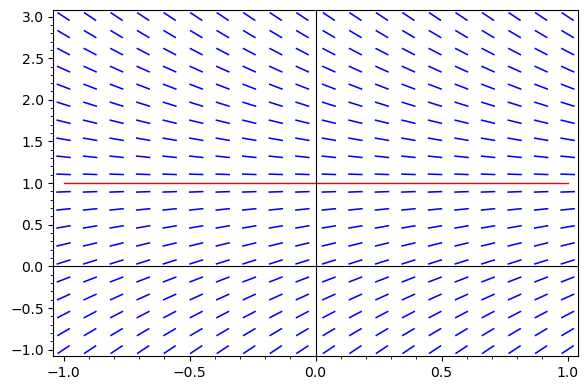

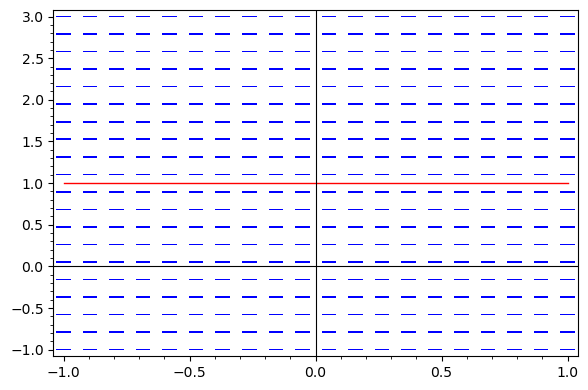

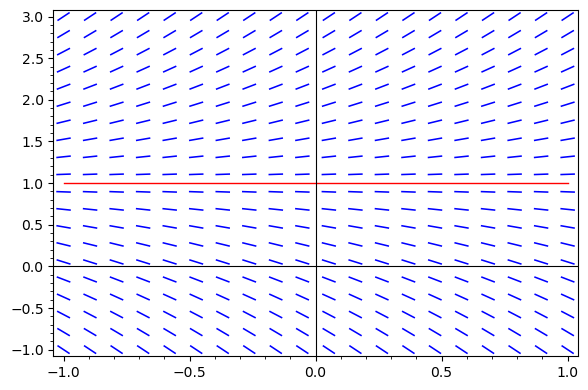

In [46]:
var("t x")

for l in [-1,0,1]: 

    f = l * (x-1)

    g = Graphics()

    g += plot_slope_field(f, (t, -1, 1), (x, -1,  3), color='blue')

    g += plot( 1 , (t, -1, 1), color = 'red')

    g.show()



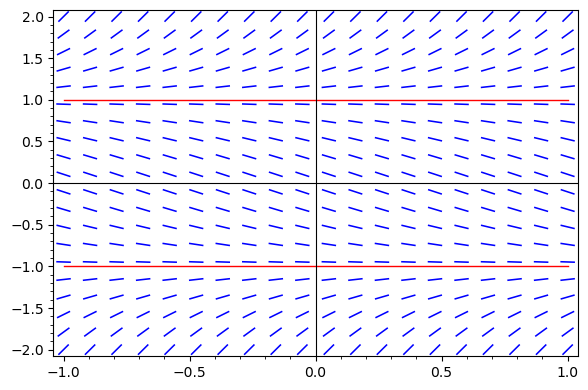

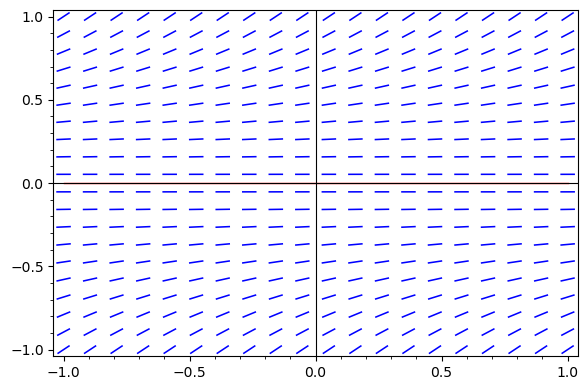

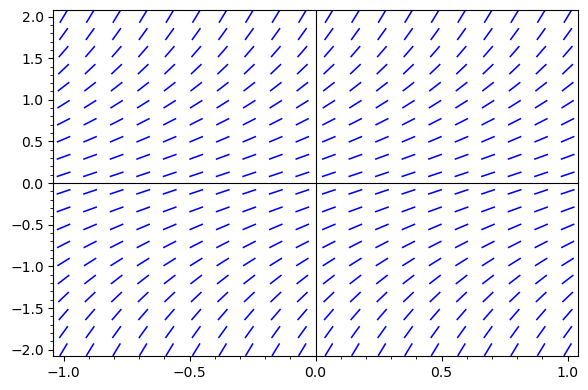

In [47]:
var("t x")

for l in [-1,0,1]: 


    a = sqrt(abs(l))

    f = l + x^2

    g = Graphics()

    g += plot_slope_field(f, (t, -1, 1), (x, -a-1,  a+1), color='blue')

    if l == 0 :
        g += plot(0, (t,-1,1), color = "red") 

    if l  < 0:
        g += plot(-a, (t,-1,1), color = "red")
        g += plot(a, (t,-1,1), color = "red")

    g.show()